In [1]:
# Import our libraries
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

In [2]:
##############################################################
### OUTLINE FOR ANALYST RANKING LEADERBOARD ###




### History of Recommendations for stock(s) ###


### Leaderboard Ranking based on: Accuracy, Influence, Clout, etc ###


### Industry and Sector Forecasts ###


##############################################################

In [3]:
##############################################################
### OUTLINE FOR NEWS & OPINION POLLS ###


##############################################################
### NEWS ###

### Relevant News Stream With Watchlist Mentions ###


### News and Social Media Sentiment Metrics ###


### News Aggregation Stream ###


### Market News: IPOs, Defaults, M&A, Movements ###


##############################################################
### OPINION POLLS ###


### Bull/Bear Polls ###


### VIX & VIX Sentiment ###


### Margin Debt Indicator ###


### Short Interest and Short Indicators ###


### Unusual Options Activity ###

In [4]:
##############################################################
### OUTLINE FOR STOCK INFORMATION ###


### Stock Metrics ###


### Information ###


### Error Handling ###


### Charts ###


### Analysts Activity and Ranking ###

In [15]:
##############################################################
### OUTLINE FOR GLOBAL MOVEMENTS ###

# Here we want to gather and display data from indicies around the world
indicies = {'^GSPC': 'SP500',
            '^IXIC': 'Nasdaq,',
           '^VIX': 'VIX',
           '^FTSE': 'FTSE 100 (UK)',
           '^FCHI': 'CAC40 (FRANCE)',
           '^N225': 'Nikkei (Japan)',
           '^MXX': 'IPC MX (Mexico)'}

tickers = indicies.keys()
ticknames = indicies.values()




# building our dataframe
def globalmarkets(tickers):
    indiciesClose = []

    for tick in tickers:
        indicies = yf.download(tick, period='5y').Close
        # Stores our dataframe in list
        indiciesClose.append(indicies)
        closedf = pd.DataFrame(indiciesClose)
        plot = closedf.T.plot()
        
        # indiciesClose = pd.concat(indiciesClose)
    return plot


### Indicies Price Changes ###


### Indicies Metrics ###


### Sector Metrics ###


### Sector Price Changes ### 

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<AxesSubplot:xlabel='Date'>

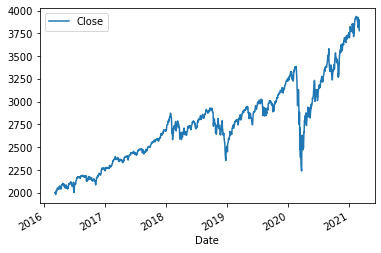

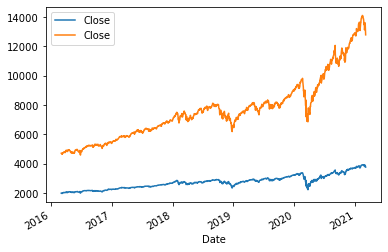

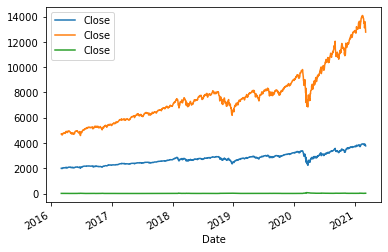

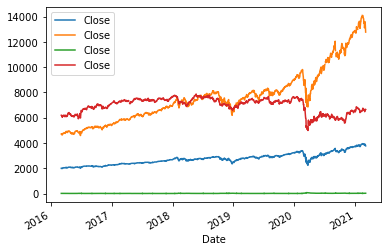

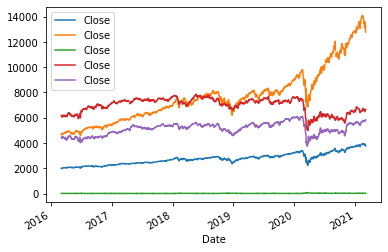

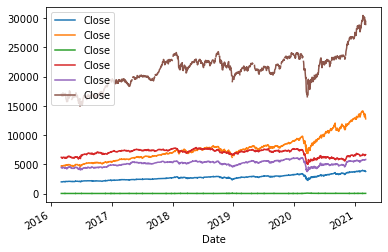

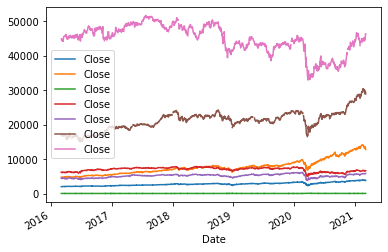

In [16]:
globalmarkets(tickers)


In [ ]:
##############################################################
### OUTLINE FOR GLOBAL NEWS & SENTIMENT ###


### Global Foreign News Translator ###


### Foreign Social Media Sentiment Monitor ###


### Monetary Policy and Fiscal Policy News Monitor ###


### Government Movements Monitor ###


### Top Central Banks Movements and Bal. Sheet Changes ###

